I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and have used Machine Learning(classification algorithms) to predict whether any person is suffering from heart disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualize target variable ##

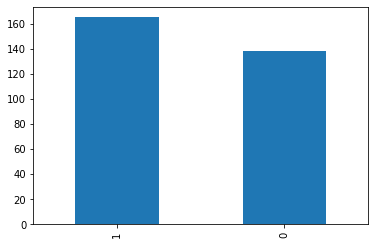

In [9]:
df['target'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CC52F58>,
      dtype=object)

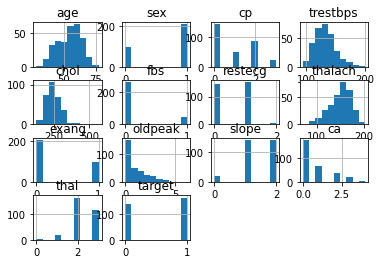

In [10]:
df.hist()

## Feature selection

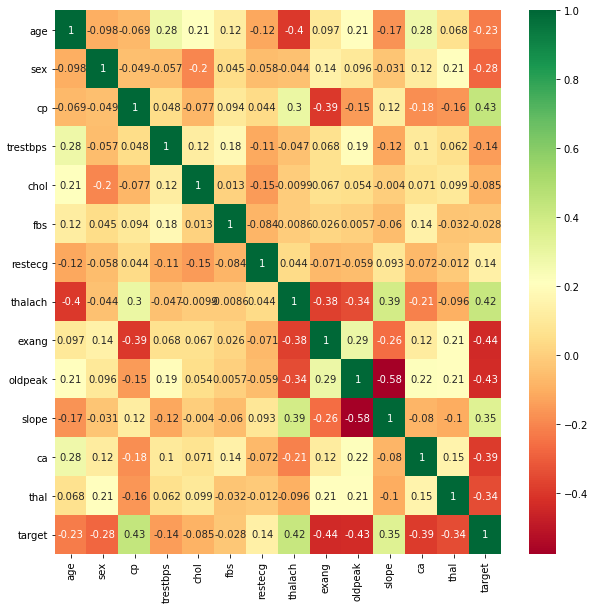

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Checking data set is balanced or not

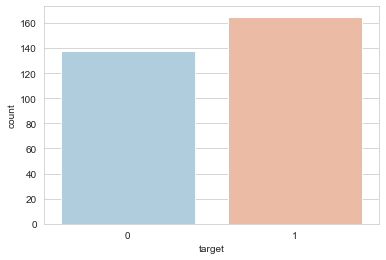

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [13]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [16]:
X= df.drop(['target'], axis=1)
y=df['target']

## Using Train_test_split ##

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X, y,test_size=0.2)

In [18]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(242,)
(61,)
(242, 13)
(61, 13)


## KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
Knn= KNeighborsClassifier()
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
Kneighbor_test= Knn.predict(X_test)
Kneighbor_train= Knn.predict(X_train)

In [21]:
from sklearn import metrics
print('Accuracy Score for test data in KNN model is:',(metrics.accuracy_score(y_test,Kneighbor_test)))
print('Accuracy Score for training data in KNN model is:',(metrics.accuracy_score(y_train,Kneighbor_train)))

Accuracy Score for test data in KNN model is: 0.6885245901639344
Accuracy Score for training data in KNN model is: 0.8760330578512396


In [22]:
Knn6= KNeighborsClassifier(n_neighbors=6)
Knn6.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [23]:
Kneighbor_test6= Knn6.predict(X_test)
Kneighbor_train6= Knn6.predict(X_train)

In [24]:
from sklearn import metrics
print('Accuracy Score for test data in KNN model is:',(metrics.accuracy_score(y_test,Kneighbor_test6)))
print('Accuracy Score for training data in KNN model is:',(metrics.accuracy_score(y_train,Kneighbor_train6)))

Accuracy Score for test data in KNN model is: 0.6885245901639344
Accuracy Score for training data in KNN model is: 0.8760330578512396


## Decision Tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
decision_model= DecisionTreeClassifier(max_depth=3)
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
decision_test=decision_model.predict(X_test)
decision_train=decision_model.predict(X_train)

In [27]:
from sklearn import metrics
print('Accuracy Score for test data in KNN model is:',(metrics.accuracy_score(y_test,decision_test)))

print('Accuracy Score for train data in KNN model is:',(metrics.accuracy_score(y_train,decision_train)))

Accuracy Score for test data in KNN model is: 0.7704918032786885
Accuracy Score for train data in KNN model is: 0.8760330578512396


## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
Random_classifier= RandomForestClassifier(n_estimators=70)
Random_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70)

In [29]:
Predict_Random_test= Random_classifier.predict(X_test)
Predict_Random_train= Random_classifier.predict(X_train)

In [30]:
print('Accuracy Score for test data in KNN model is:',(metrics.accuracy_score(y_test,Predict_Random_test)))
print('Accuracy Score for training data in KNN model is:',(metrics.accuracy_score(y_train,Predict_Random_train)))

Accuracy Score for test data in KNN model is: 0.7868852459016393
Accuracy Score for training data in KNN model is: 1.0


## Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
logistic_test= logreg.predict(X_test)
logistic_train= logreg.predict(X_train)

In [33]:
print('Accuracy Score for test data in KNN model is:',(metrics.accuracy_score(y_test,logistic_test)))
print('Accuracy Score for training data in KNN model is:',(metrics.accuracy_score(y_train,logistic_train)))

Accuracy Score for test data in KNN model is: 0.7540983606557377
Accuracy Score for training data in KNN model is: 0.8760330578512396


## Using Cross validation

## KNeighborsClassifier

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [35]:
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.8083870967741935

In [36]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

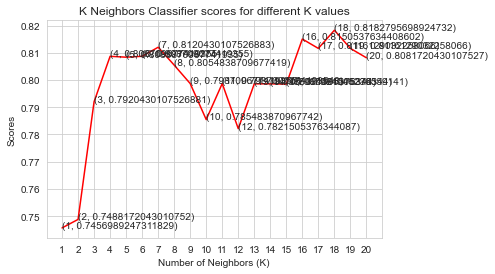

In [37]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [38]:
knn_classifier = KNeighborsClassifier(n_neighbors = 18)
score_Knn=cross_val_score(knn_classifier,X,y,cv=10)

In [39]:
score_Knn.mean()

0.8182795698924732

## Decisiontreeclassifier

In [40]:
decision_model= DecisionTreeClassifier(max_depth=3)
score_decision=cross_val_score(decision_model,X,y,cv=10)

In [41]:
score_decision.mean()

0.8080645161290322

## Random forest Classifier

In [42]:
Random_classifier= RandomForestClassifier(n_estimators=26)
score_randon_tree=cross_val_score(Random_classifier,X,y,cv=10)

In [43]:
score_randon_tree.mean()

0.811505376344086

## Logistic regression

In [44]:
logreg = LogisticRegression(penalty='none')
score_logistic=cross_val_score(logreg,X,y,cv=10)

In [45]:
score_logistic.mean()

0.8116129032258066

## PCA

In [46]:
from sklearn.decomposition import PCA 

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [47]:
pca.explained_variance_ratio_

array([0.26021574, 0.16036245, 0.15180971, 0.12054126, 0.07395624,
       0.06323967, 0.04781063, 0.03256484, 0.02322211, 0.02189837,
       0.0193442 , 0.01577509, 0.00925969])

In [48]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)


KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test_pca)

In [50]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.26229508196721313


In [51]:
pca2 = PCA(n_components = 10)

X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.fit_transform(X_test)

In [52]:
pca2.explained_variance_ratio_

array([0.26021574, 0.16036245, 0.15180971, 0.12054126, 0.07395624,
       0.06323967, 0.04781063, 0.03256484, 0.02322211, 0.02189837])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_pca2, y_train)


KNeighborsClassifier(n_neighbors=4)

In [54]:
y_pred2 = knn.predict(X_test_pca2)

In [55]:
print("Accuracy:", accuracy_score(y_test,y_pred2))

Accuracy: 0.2459016393442623


Text(0, 0.5, 'Second Principal Component')

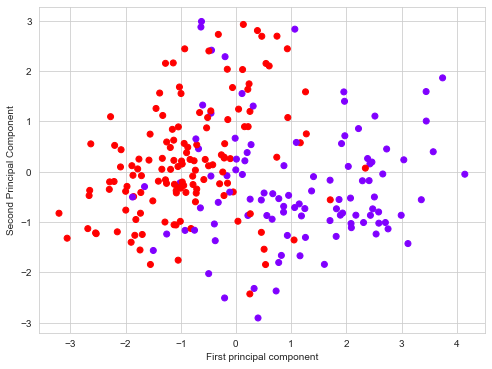

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca2[:,0],X_train_pca2[:,1],c=y_train,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [58]:
lda = LDA(n_components=1)

X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

In [59]:
kn = KNeighborsClassifier()
kn.fit(X_train_lda,y_train)

KNeighborsClassifier()

In [60]:
pred = kn.predict(X_test_lda)
print("Accuracy:", accuracy_score(y_test,pred))

Accuracy: 0.6721311475409836


Text(0, 0.5, 'Second LDA Component')

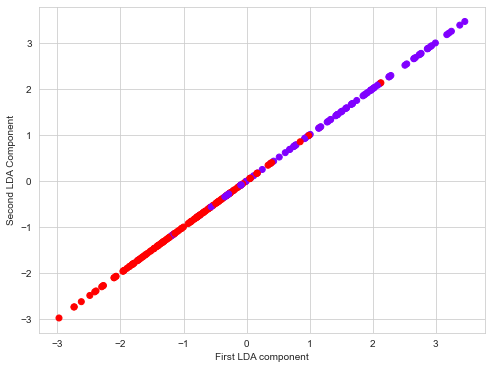

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[:,0],X_train_lda[:,:],c=y_train,cmap='rainbow')
plt.xlabel('First LDA component')
plt.ylabel('Second LDA Component')
